In [101]:
import pandas as pd

In [102]:
data = pd.read_csv('data/titanic.csv')

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
#пропущенные значения
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
#возможные значения
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [106]:
# указываем зависимую перменную отвечающую за выживание
y = data['Survived']

In [107]:
# Кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Sex'])
data['Sex']=le.transform(data['Sex'])

In [118]:
data['Cabin'] = data['Cabin'].fillna('NA')
data['Cabin'] = data.Cabin.apply(lambda x: x[0])
le.fit(data['Cabin'])
data['Cabin']=le.transform(data['Cabin'])

In [119]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Family,Is_Alone
0,3,1,22.0,1,0,7.2500,7,1,False
1,1,0,38.0,1,0,71.2833,2,1,False
2,3,0,26.0,0,0,7.9250,7,0,True
3,1,0,35.0,1,0,53.1000,2,1,False
4,3,1,35.0,0,0,8.0500,7,0,True


In [110]:
#SibSp — число братьев + Parch - количество родителей или детей
data['Family'] = data.Parch + data.SibSp
data['Is_Alone'] = data.Family == 0

In [111]:
# дозаполняем пропуски
data['Age'].fillna(data['Age'].median(), inplace=True)

In [112]:
# удаляем из входов зависимую перменную и незначимые  признаки
data.drop(['Survived', 'Name', 'PassengerId', 'Ticket' , 'Embarked'], axis=1, inplace=True)

In [113]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Family,Is_Alone
0,3,1,22.0,1,0,7.2500,N,1,False
1,1,0,38.0,1,0,71.2833,C,1,False
2,3,0,26.0,0,0,7.9250,N,0,True
3,1,0,35.0,1,0,53.1000,C,1,False
4,3,1,35.0,0,0,8.0500,N,0,True


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

### Логистическая регрессия

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
regr = LogisticRegression()

In [121]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
#предсказываем
y_pred = regr.predict(X_test)
y_pred_proba = regr.predict_proba(X_test)

In [125]:
#коэффициент детерминации

score = regr.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 79.37 %


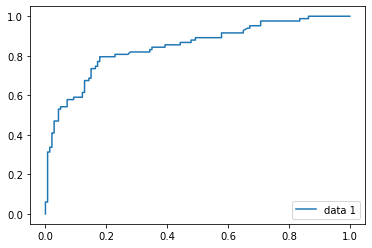

In [162]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [151]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:,1])

0.846170395869191

### Дерево решений

In [126]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
y_pred = tree.predict(X_test)
y_pred_proba = tree.predict_proba(X_test)

In [152]:
from sklearn.metrics import accuracy_score
#accuracy - доля верных ответов 
accuracy_score(y_test, y_pred)

0.7937219730941704

In [138]:
score = tree.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 78.92 %


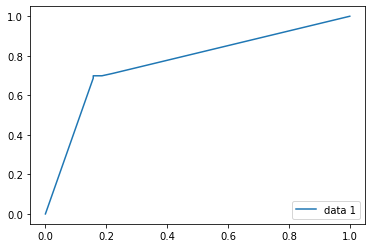

In [164]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [154]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.7651032702237521

### Алгоритм knn

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [165]:
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

In [140]:
print("Точноть предсказания: %.2f" % (accuracy_score(y_test, y_pred) * 100) + ' %' )

Точноть предсказания: 75.34 %


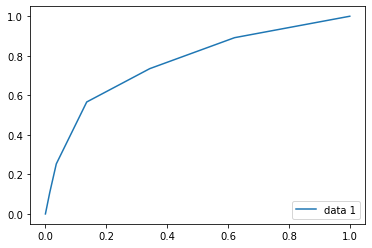

In [166]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [156]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.764974182444062